In [134]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense, LSTM, Input, Dropout, TimeDistributed, RepeatVector, Activation
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.callbacks import EarlyStopping




ModuleNotFoundError: No module named 'PdM_LSTM_nasa_turbofan_functions'

data preparations

In [45]:
columns1=["test_results","null"]

In [46]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4",
         "sensor5","sensor6","sensor7","sensor8","sensor9","sensor10","sensor11",
         "sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]


In [50]:
train = pd.read_csv(r'C:\Users\isilh\OneDrive/Masaüstü/nasa\train_FD001.txt', sep=" ", header=None, names=columns)
test=pd.read_csv(r'C:\Users\isilh\OneDrive/Masaüstü/nasa/test_FD001.txt', sep=" ", header=None, names=columns)
test_results=pd.read_csv(r'C:\Users\isilh\OneDrive/Masaüstü/nasa/train_FD001.txt', sep=" ", header=None, names=columns)

In [51]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [52]:
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   op1       13096 non-null  float64
 3   op2       13096 non-null  float64
 4   op3       13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [55]:
test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [56]:
print(f"Number of unique engine ids in train set: {len(train.id.unique())}")
print(f"Number of unique engine ids in test set: {len(test.id.unique())}")

Number of unique engine ids in train set: 100
Number of unique engine ids in test set: 100


In [57]:
train = train.drop(["sensor22", "sensor23"], axis=1)
test = test.drop(["sensor22", "sensor23"], axis=1)

In [58]:
test.ndim

2

In [59]:
train.ndim

2

In [60]:
test.isnull().values.any()

False

In [61]:
train.isnull().values.any()

False

In [62]:
test_results.isnull().values.any()

True

In [63]:
test_results


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


Outlier analysis

In [64]:
test_results = test_results.drop(["null"], axis=1)

KeyError: "['null'] not found in axis"

In [ ]:
test_results

In [65]:
colnum=len(train.columns)
colnum

26

In [66]:
test.dtypes

id            int64
cycle         int64
op1         float64
op2         float64
op3         float64
sensor1     float64
sensor2     float64
sensor3     float64
sensor4     float64
sensor5     float64
sensor6     float64
sensor7     float64
sensor8     float64
sensor9     float64
sensor10    float64
sensor11    float64
sensor12    float64
sensor13    float64
sensor14    float64
sensor15    float64
sensor16    float64
sensor17      int64
sensor18      int64
sensor19    float64
sensor20    float64
sensor21    float64
dtype: object

In [67]:
train=train.astype(float)

In [68]:
train.dtypes

id          float64
cycle       float64
op1         float64
op2         float64
op3         float64
sensor1     float64
sensor2     float64
sensor3     float64
sensor4     float64
sensor5     float64
sensor6     float64
sensor7     float64
sensor8     float64
sensor9     float64
sensor10    float64
sensor11    float64
sensor12    float64
sensor13    float64
sensor14    float64
sensor15    float64
sensor16    float64
sensor17    float64
sensor18    float64
sensor19    float64
sensor20    float64
sensor21    float64
dtype: object

In [69]:
train.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21'],
      dtype='object')

In [70]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
train.value_counts()

id     cycle  op1      op2      op3    sensor1  sensor2  sensor3  sensor4  sensor5  sensor6  sensor7  sensor8  sensor9  sensor10  sensor11  sensor12  sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  sensor19  sensor20  sensor21
1.0    1.0    -0.0007  -0.0004  100.0  518.67   641.82   1589.70  1400.60  14.62    21.61    554.36   2388.06  9046.19  1.3       47.47     521.66    2388.02   8138.62   8.4195    0.03      392.0     2388.0    100.0     39.06     23.4190     1
69.0   151.0   0.0026   0.0002  100.0  518.67   642.57   1585.42  1406.85  14.62    21.61    554.12   2388.03  9058.23  1.3       47.50     521.81    2388.04   8141.88   8.4310    0.03      392.0     2388.0    100.0     38.79     23.3772     1
       129.0   0.0005   0.0000  100.0  518.67   642.33   1586.03  1401.70  14.62    21.61    552.89   2388.02  9067.43  1.3       47.51     521.76    2388.07   8142.81   8.4059    0.03      392.0     2388.0    100.0     38.96     23.3278     1
       128.0   0.0011  -0.000

In [72]:
#sns.pairplot(test,hue='cycle')

In [73]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1.0,1.0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190
1,1.0,2.0,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236
2,1.0,3.0,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442
3,1.0,4.0,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739
4,1.0,5.0,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044


Text(0.5, 1.0, 'Number of Cycles of Different Engines')

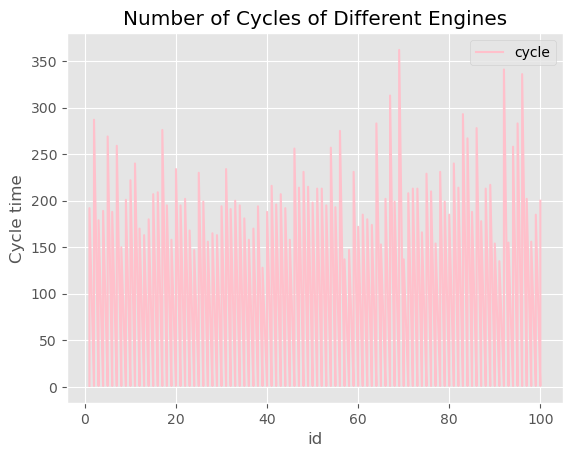

In [74]:
train.plot(kind='line', x='id', y='cycle',alpha =1,color = 'pink')
plt.xlabel('id')              
plt.ylabel('Cycle time')
plt.title('Number of Cycles of Different Engines')

Multicollinearity, normal dist. and corrolation

In [75]:
#sns.pairplot(test.drop("id", axis=1), hue="cycle", size=3)

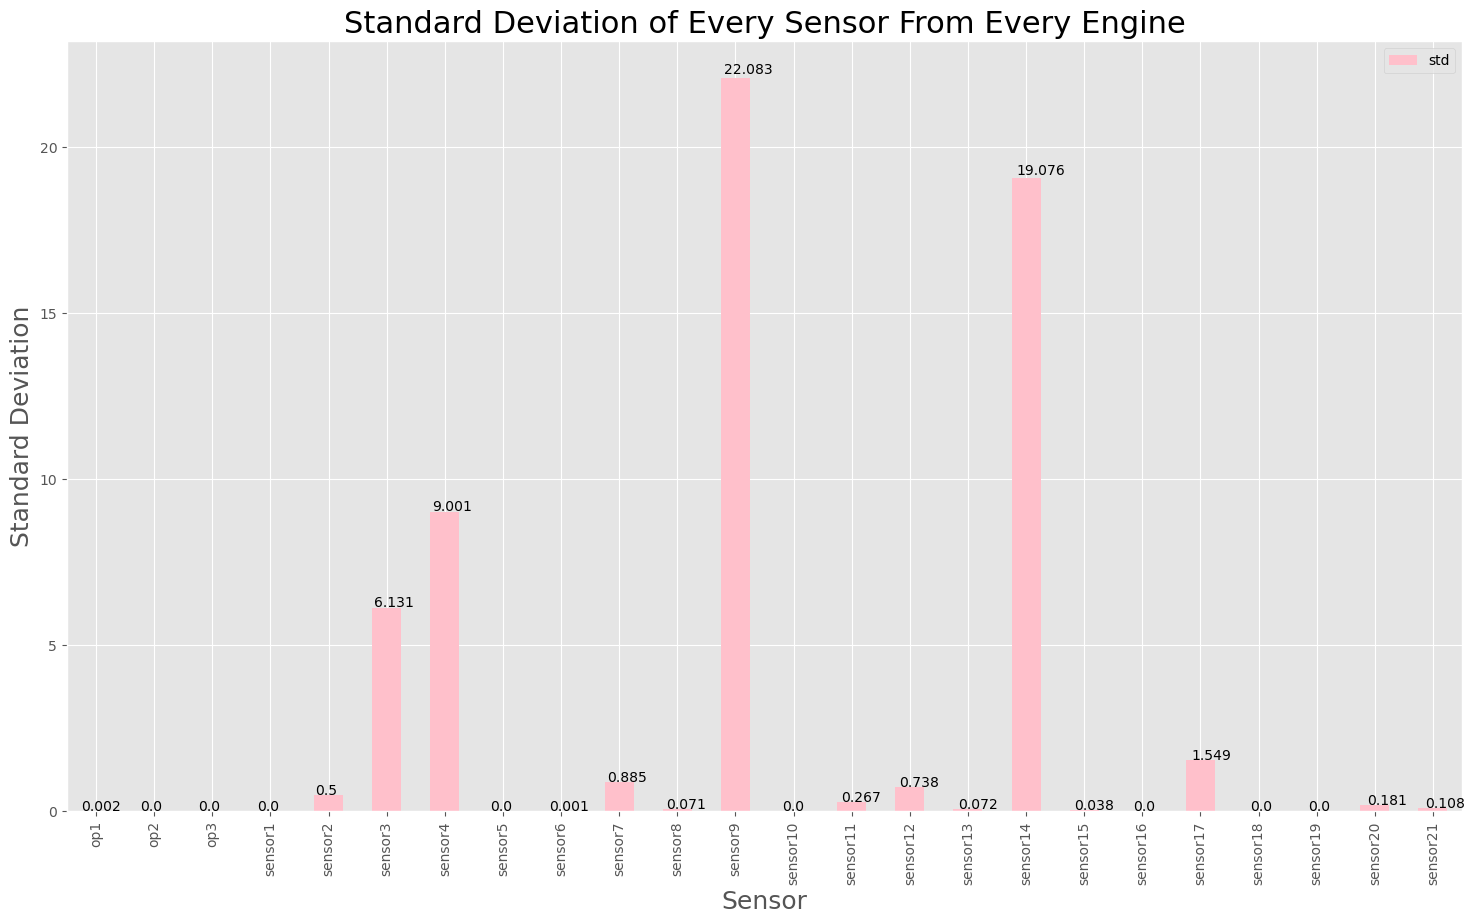

In [76]:
subset_stats = train.agg(['mean', 'std']).T[2:]
ax = subset_stats.plot.bar(figsize=(18,10), 
                           y="std",color = 'pink')
ax.set_title("Standard Deviation of Every Sensor From Every Engine", fontsize=22)
ax.set_xlabel("Sensor", fontsize=18)
ax.set_ylabel("Standard Deviation", fontsize=18)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [77]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

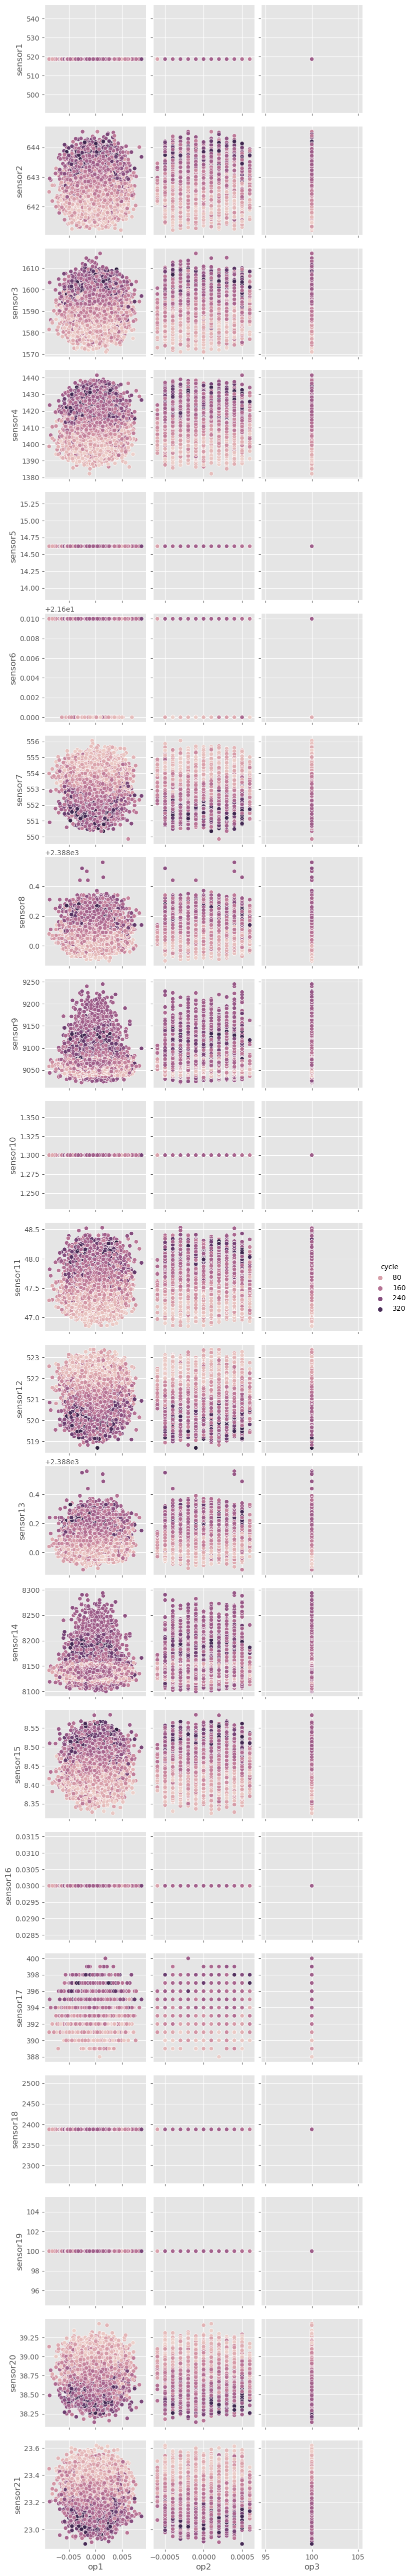

In [78]:
sns.pairplot(train, hue="cycle",x_vars=op_set,y_vars=sensor)

In [79]:
train.drop(["op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=True)

<Axes: >

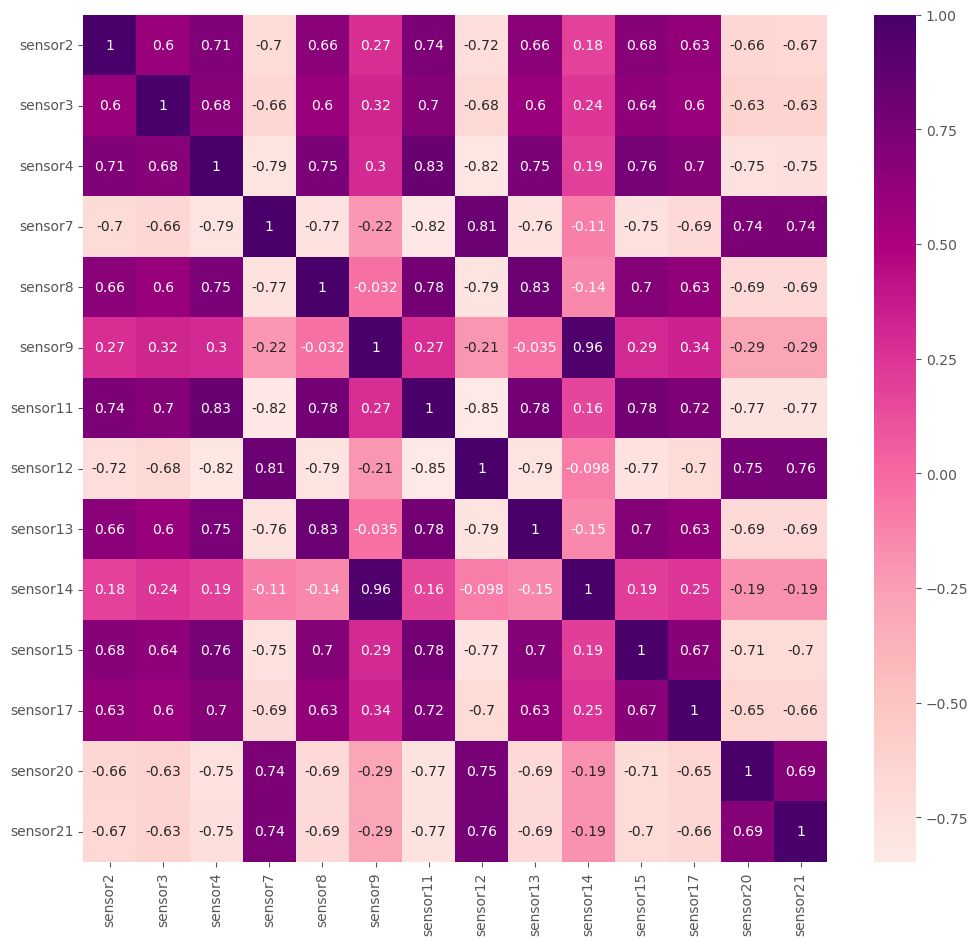

In [80]:
corr = train.drop(["id", "cycle", "op1", "op2"], axis=1).corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,11)
sns.heatmap(corr, annot=True, cmap="RdPu", center=0, ax=ax)

<Axes: >

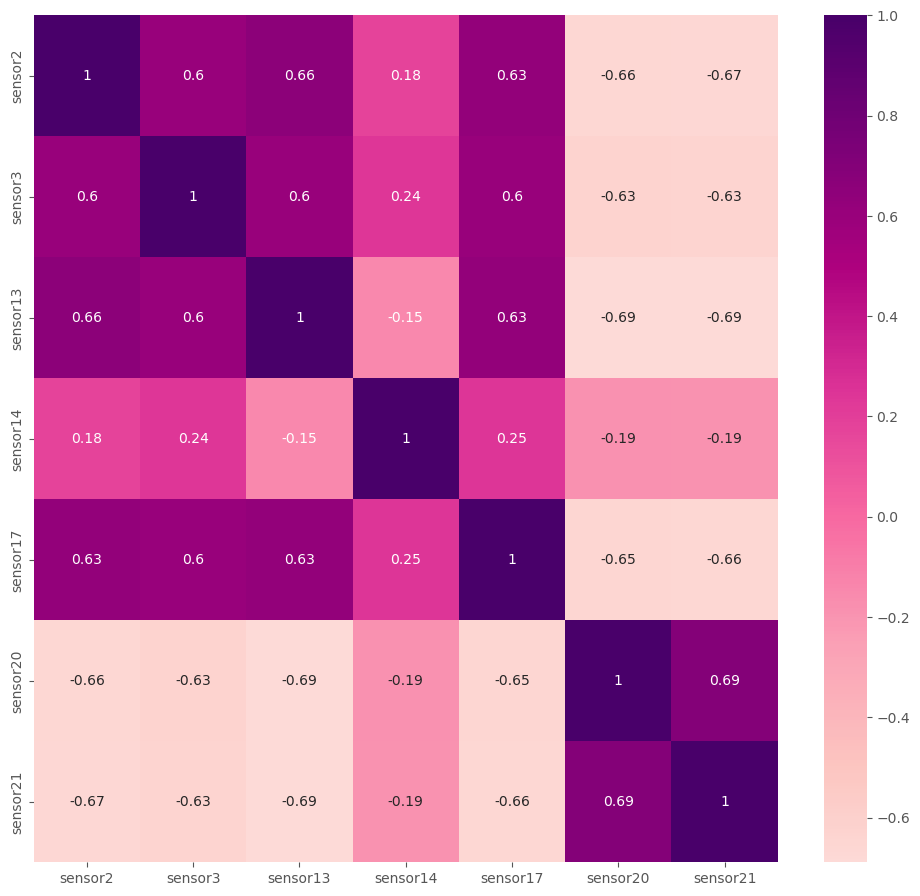

In [81]:
corr = train.drop(["sensor4","sensor7","id", "cycle", "op1", "op2","sensor11","sensor9","sensor12","sensor8","sensor15"], axis=1).corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,11)
sns.heatmap(corr, annot=True, cmap="RdPu", center=0, ax=ax)

In [82]:
train.drop(["sensor4","sensor7","sensor11","sensor9","sensor12","sensor8","sensor15"],axis=1,inplace=True)
test.drop(["sensor4","sensor7", "op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","sensor11","sensor9","sensor12","sensor8","sensor15"],axis=1,inplace=True)

Axes(0.125,0.11;0.775x0.77)


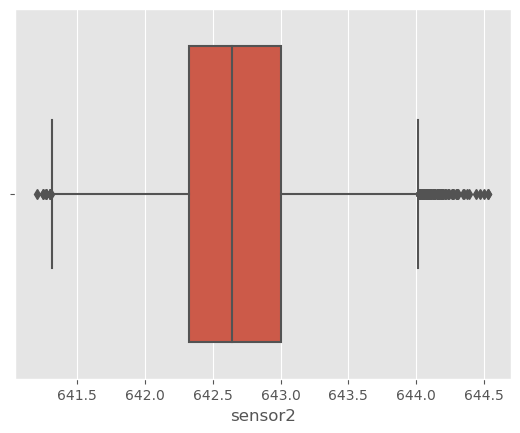

In [83]:
print(sns.boxplot(x = train['sensor2']))

In [84]:
print(train["sensor2"])

0        641.82
1        642.15
2        642.35
3        642.35
4        642.37
          ...  
20626    643.49
20627    643.54
20628    643.42
20629    643.23
20630    643.85
Name: sensor2, Length: 20631, dtype: float64


Axes(0.125,0.11;0.775x0.77)


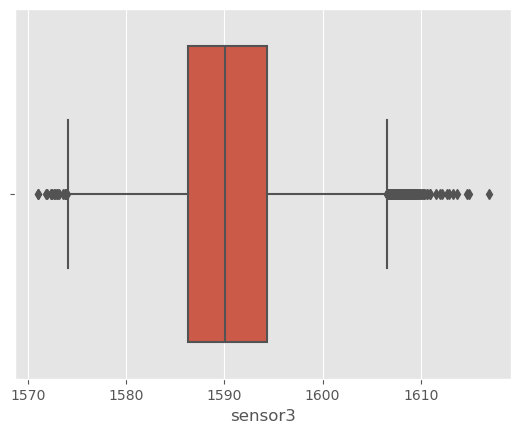

In [85]:
print(sns.boxplot(x = train['sensor3']))


Axes(0.125,0.11;0.775x0.77)


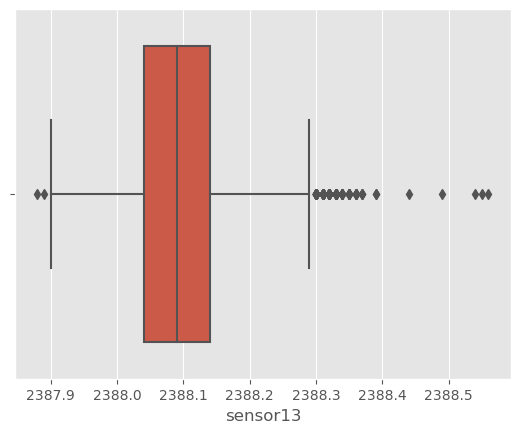

In [86]:
print(sns.boxplot(x = train['sensor13']))


Axes(0.125,0.11;0.775x0.77)


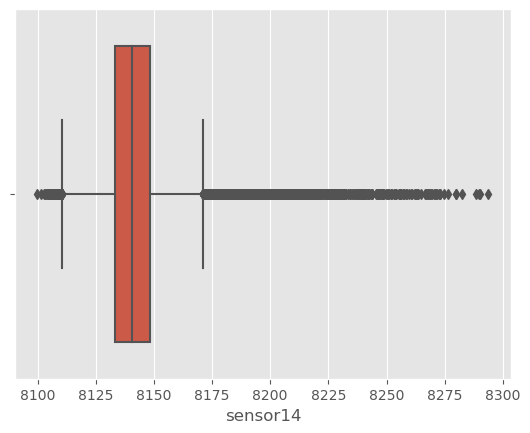

In [87]:
print(sns.boxplot(x = train['sensor14']))


Axes(0.125,0.11;0.775x0.77)


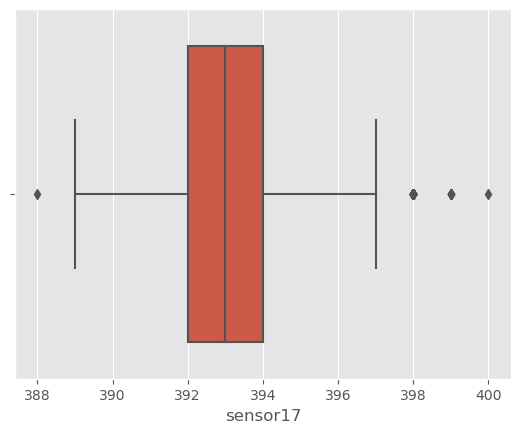

In [88]:
print(sns.boxplot(x = train['sensor17']))


Axes(0.125,0.11;0.775x0.77)


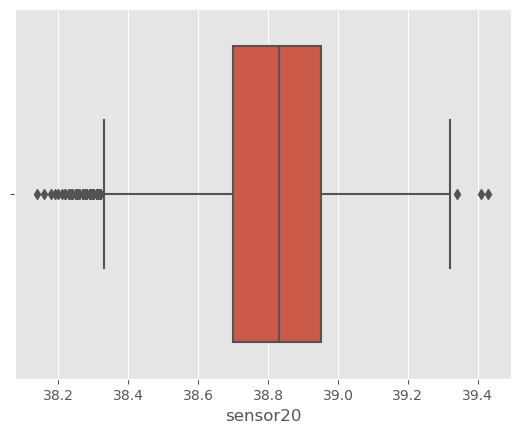

In [89]:
print(sns.boxplot(x = train['sensor20']))


Axes(0.125,0.11;0.775x0.77)


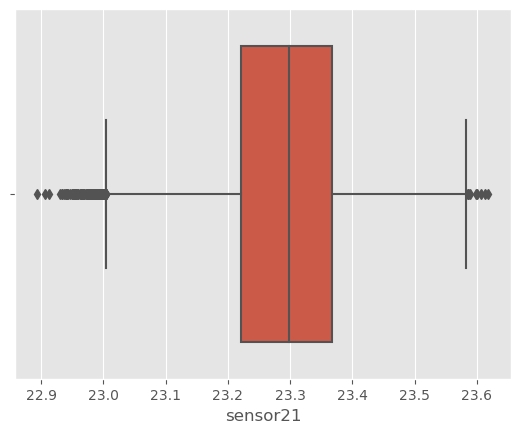

In [90]:
print(sns.boxplot(x = train['sensor21']))

Sensor datası için outlier analizi

In [91]:
n=0
for n in [2,3,13,14,17,20,21]:
    train_sensor = train["sensor"+str(n)] 
    
    Q3, Q1 = np.percentile(train_sensor, [75 ,25])
    IQR=Q3-Q1
    alt_sinir = Q1- 1.5*IQR
    ust_sinir = Q3 + 1.5*IQR
    
 
    (train_sensor > ust_sinir )| (train_sensor < alt_sinir)
    aykiri_ust = (train_sensor > ust_sinir )
    aykiri_alt = (train_sensor < alt_sinir)
    train_sensor[aykiri_ust]=ust_sinir
    train_sensor[aykiri_alt]=alt_sinir
    n=n+1

Axes(0.125,0.11;0.775x0.77)


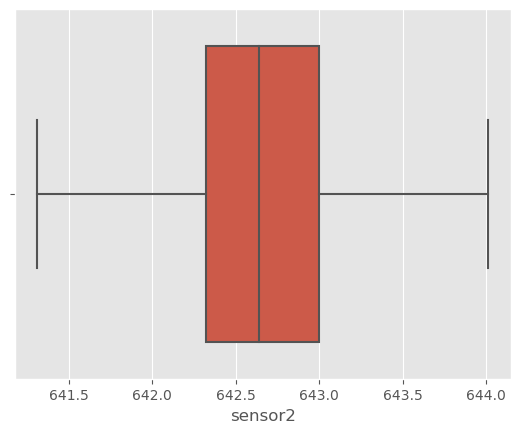

In [92]:
print(sns.boxplot(x = train['sensor2']))

Axes(0.125,0.11;0.775x0.77)


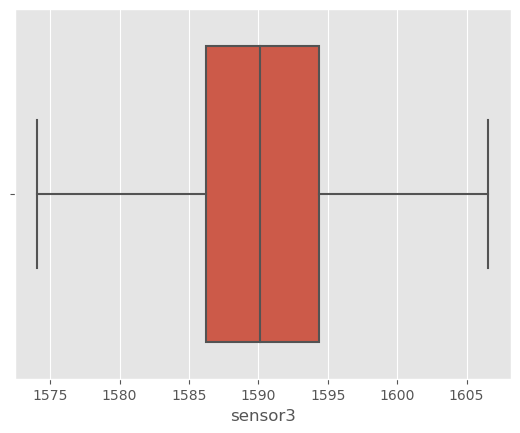

In [93]:
print(sns.boxplot(x = train['sensor3']))

Axes(0.125,0.11;0.775x0.77)


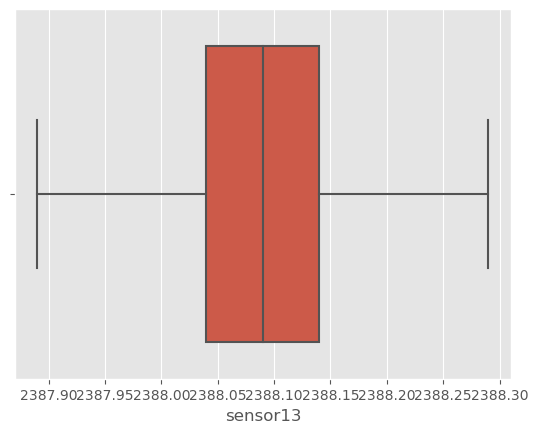

In [94]:
print(sns.boxplot(x = train['sensor13']))

Axes(0.125,0.11;0.775x0.77)


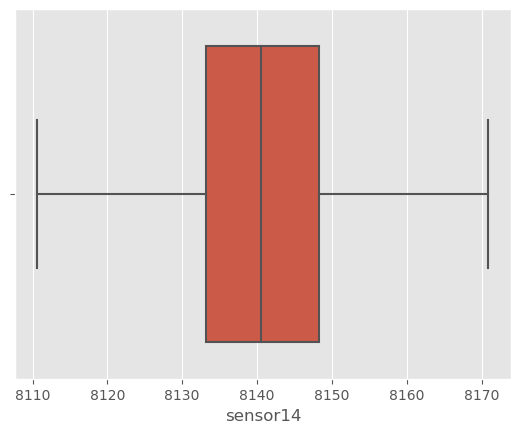

In [95]:
print(sns.boxplot(x = train['sensor14']))

Axes(0.125,0.11;0.775x0.77)


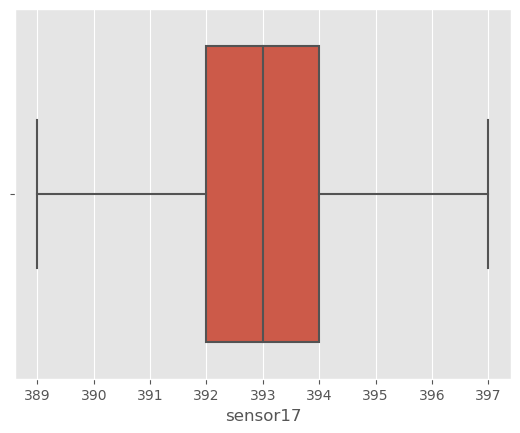

In [96]:
print(sns.boxplot(x = train['sensor17']))

Axes(0.125,0.11;0.775x0.77)


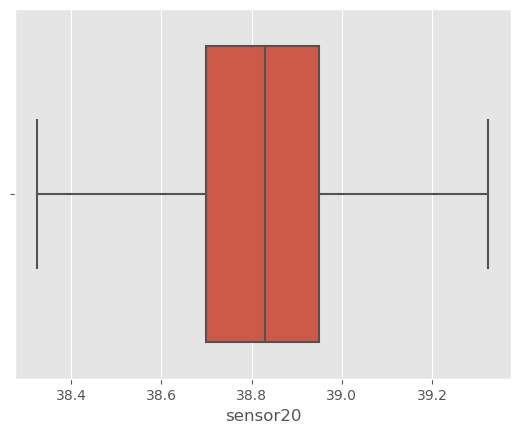

In [97]:
print(sns.boxplot(x = train['sensor20']))

Axes(0.125,0.11;0.775x0.77)


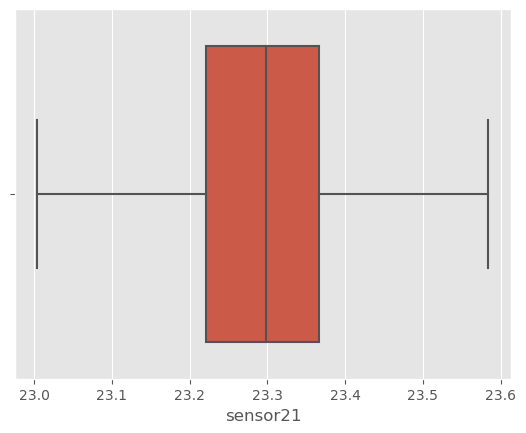

In [98]:
print(sns.boxplot(x = train['sensor21']))

LSTM

In [100]:
test_results=pd.read_csv(r'C:\Users\isilh\OneDrive/Masaüstü/nasa/RUL_FD001.txt',sep=" ",header=None).drop([1],axis=1)
test_results.columns=['more']
test_results['id']=test_results.index+1
test_results.head()

,more,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [101]:
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [102]:
train.head()

,id,cycle,op1,op2,sensor2,sensor3,sensor13,sensor14,sensor17,sensor20,sensor21
0,1.0,1.0,-0.0007,-0.0004,641.82,1589.70,2388.02,8138.62,392.0,39.06,23.4190
1,1.0,2.0,0.0019,-0.0003,642.15,1591.82,2388.07,8131.49,392.0,39.00,23.4236
2,1.0,3.0,-0.0043,0.0003,642.35,1587.99,2388.03,8133.23,390.0,38.95,23.3442
3,1.0,4.0,0.0007,0.0000,642.35,1582.79,2388.08,8133.83,392.0,38.88,23.3739
4,1.0,5.0,-0.0019,-0.0002,642.37,1582.85,2388.04,8133.80,393.0,38.90,23.4044


In [103]:
# run to failure
test_results['rtf']=test_results['more']+rul['max']
test_results.head()

,more,id,rtf
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [104]:
test_results.drop('more', axis=1, inplace=True)
test = test.merge(test_results, on=['id'], how='left')
test['ttf']= test['rtf'] - test['cycle']
test.drop('rtf', axis=1, inplace=True)
test.head()

,id,cycle,op1,op2,sensor2,sensor3,sensor13,sensor14,sensor17,sensor20,sensor21,ttf
0,1,1,0.0023,0.0003,643.02,1585.29,2388.03,8125.55,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,2388.06,8139.62,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,2388.03,8130.10,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,2388.05,8132.90,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,2388.03,8129.54,390,38.99,23.4130,138


In [105]:
train['ttf'] = train.groupby(['id'])['cycle'].transform(max)-train['cycle']
train.head()

,id,cycle,op1,op2,sensor2,sensor3,sensor13,sensor14,sensor17,sensor20,sensor21,ttf
0,1.0,1.0,-0.0007,-0.0004,641.82,1589.70,2388.02,8138.62,392.0,39.06,23.4190,191.0
1,1.0,2.0,0.0019,-0.0003,642.15,1591.82,2388.07,8131.49,392.0,39.00,23.4236,190.0
2,1.0,3.0,-0.0043,0.0003,642.35,1587.99,2388.03,8133.23,390.0,38.95,23.3442,189.0
3,1.0,4.0,0.0007,0.0000,642.35,1582.79,2388.08,8133.83,392.0,38.88,23.3739,188.0
4,1.0,5.0,-0.0019,-0.0002,642.37,1582.85,2388.04,8133.80,393.0,38.90,23.4044,187.0


In [106]:
train=train.copy()
test=test.copy()
period=30
train['label_bc'] = train['ttf'].apply(lambda x: 1 if x <= period else 0)
test['label_bc'] = test['ttf'].apply(lambda x: 1 if x <= period else 0)
train.head()

,id,cycle,op1,op2,sensor2,sensor3,sensor13,sensor14,sensor17,sensor20,sensor21,ttf,label_bc
0,1.0,1.0,-0.0007,-0.0004,641.82,1589.70,2388.02,8138.62,392.0,39.06,23.4190,191.0,0
1,1.0,2.0,0.0019,-0.0003,642.15,1591.82,2388.07,8131.49,392.0,39.00,23.4236,190.0,0
2,1.0,3.0,-0.0043,0.0003,642.35,1587.99,2388.03,8133.23,390.0,38.95,23.3442,189.0,0
3,1.0,4.0,0.0007,0.0000,642.35,1582.79,2388.08,8133.83,392.0,38.88,23.3739,188.0,0
4,1.0,5.0,-0.0019,-0.0002,642.37,1582.85,2388.04,8133.80,393.0,38.90,23.4044,187.0,0


In [120]:
features_col_name=["id","cycle","op1","op2","sensor2","sensor3","sensor13","sensor14","sensor17"
         ,"sensor20","sensor21"]
target_col_name='label_bc'

In [123]:
seq_length=10
seq_cols=features_col_name

In [124]:
X_train=np.concatenate(list(list(gen_sequence(train[train['id']==id], seq_length, seq_cols)) for id in train['id'].unique()))
print(X_train.shape)

y_train=np.concatenate(list(list(gen_label(train[train['id']==id], 50, seq_cols,'label_bc')) for id in train['id'].unique()))
print(y_train.shape)

(20531, 10, 11)
(20531,)


In [125]:

X_test=np.concatenate(list(list(gen_sequence(test[test['id']==id], seq_length, seq_cols)) for id in test['id'].unique()))
print(X_test.shape)

y_test=np.concatenate(list(list(gen_label(test[test['id']==id], 50, seq_cols,'label_bc')) for id in test['id'].unique()))
print(y_test.shape)

(12996, 10, 11)
(12996,)


In [126]:
nb_features =X_train.shape[2]
timestamp=seq_length

model = Sequential()

model.add(LSTM(
         input_shape=(timestamp, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=60,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 100)           44800     
                                                                 
 dropout_2 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                38640     
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 83501 (326.18 KB)
Trainable params: 83501 (326.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
# fit the network
model.fit(X_train, y_train, epochs=10, batch_size=400, validation_split=0.05, verbose=1,
          callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0)])

Epoch 1/10
49/49 [==============================] - 5s 47ms/step - loss: 0.4442 - accuracy: 0.8365 - val_loss: 0.4213 - val_accuracy: 0.8491
Epoch 2/10
49/49 [==============================] - 2s 32ms/step - loss: 0.4197 - accuracy: 0.8490 - val_loss: 0.4132 - val_accuracy: 0.8491
Epoch 3/10
49/49 [==============================] - 2s 32ms/step - loss: 0.3475 - accuracy: 0.8440 - val_loss: 0.3349 - val_accuracy: 0.8491
Epoch 4/10
49/49 [==============================] - 2s 33ms/step - loss: 0.3148 - accuracy: 0.8430 - val_loss: 0.3115 - val_accuracy: 0.8491
Epoch 5/10
49/49 [==============================] - 2s 33ms/step - loss: 0.3032 - accuracy: 0.8445 - val_loss: 0.3031 - val_accuracy: 0.8491
Epoch 6/10
49/49 [==============================] - 2s 33ms/step - loss: 0.3086 - accuracy: 0.8465 - val_loss: 0.3049 - val_accuracy: 0.8491


In [128]:
scores = model.evaluate(X_train, y_train, verbose=1, batch_size=400)
print('Accurracy: {}'.format(scores[1]))


52/52 [==============================] - 1s 14ms/step - loss: 0.2925 - accuracy: 0.8490
Accurracy: 0.8490087985992432


Bi sorun olduğunu düşündüğüm için iki farklı kod çeşidiyle denedim

In [129]:
y_predict = np.argmax(model.predict(X_test), axis=-1)
print ("accuracy of model on test data" ,accuracy_score(y_test,y_predict))


407/407 [==============================] - 2s 3ms/step
accuracy of model on test data 0.9744536780547861


In [130]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
print('Accuracy of model on test data: ',accuracy_score(y_test,y_pred))

407/407 [==============================] - 1s 3ms/step
Accuracy of model on test data:  0.9744536780547861


In [ ]:
def prob_failure(machine_id):
    machine_df=test[test.id==machine_id]
    machine_test=gen_sequence(machine_df,seq_length,seq_cols)
    m_pred=model.predict(machine_test)
    failure_prob=list(m_pred[-1]*100)[0]
    return failure_prob

In [132]:
machine_id=16
print('Probability that machine will fail within 30 days: ',prob_failure(machine_id))

4/4 [==============================] - 0s 3ms/step
Probability that machine will fail within 30 days:  1.3043967
